# Invectment project

In [11]:
# import all dependencies and necessary libraries
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from scipy.optimize import minimize
# from scipy.optimize import linprog as sim

# Step 1: Mathematicalization

## Variables:
- **I**: Initial balance ($) = 40,000
- **A**: Yearly return in savings accounts = 0.07
- **M**: Yearly return on municipal bonds = 0.09
- **S**: Yearly return on stocks = 0.14
- **R**: Yearly return ($)
- **P**: Investment in stocks ($)
- **B**: Investment in bonds ($)
- **L**: Investment in a savings account ($)

## Assumptions:
- **R** (yearly return) = A x L + M x B + S x P = 0.07 x L + 0.09 x B + 0.14 x P
- 5000 ≤ **R** (yearly return)
- 10,000 ≤ **P** (stock investment)
- **P** ≤ **B** + **L**
- 5000 ≤ **L** ≤ 15000
- **P** + **B** + **L** ≤ 40,000

## Objective:
- Maximize R

# Step 2: Modeling Approach

Since this is a multivariable optimization problem with multiple constraints, we chose to use Linear Programming and Simplex Method to solve this problem.

# Step 3: Formulate the Model

In [ ]:
# non-constant variables
I, R = sp.symbols('I R') 
P, B, L = sp.symbols('P B L')

# constraints  
λ1, λ2, λ3, λ4, λ5 = sp.symbols('λ1 λ2 λ3 λ4 λ5')
R = 0.07 * L + 0.09 * B + 0.14 * P

In [21]:
# Negative because linprog does minimization
c = [-0.07, -0.09, -0.14]

A = [
    # [-0.07, -0.09, -0.14],  # Return at least $5000
    # [0, 0, -1],             # At least $10000 in stocks
    [1, 1, -1],             # Stocks <= savings + bonds
    # [1, 0, 0],              # Savings at least $5000 (lower bound handled by bounds)
    # [1, 0, 0],              # Savings at most $15000 (upper bound handled by bounds)
    [1, 1, 1]               # Total investment <= $40000
]

b = [
    # -5000,  # Return at least $5000
    # -10000, # At least $10000 in stocks
    0,      # Stocks <= savings + bonds
    # -5000,  # Savings at least $5000
    # 15000,  # Savings at most $15000 (This will be handled by bounds)
    40000   # Total investment <= $40000
]

# Bounds for each variable
x0_bounds = (5000, 15000)  # Savings between $5,000 and $15,000
x1_bounds = (0, None)      # No explicit upper bound on bonds
x2_bounds = (10000, None)  # At least $10,000 in stocks
bounds = [x0_bounds, x1_bounds, x2_bounds]
# Run the linear program

result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

if result.success:
    print("Optimization was successful")
    print(f"Savings (s) = ${result.x[0]:,.2f}")
    print(f"Bonds (b) = ${result.x[1]:,.2f}")
    print(f"Stocks (k) = ${result.x[2]:,.2f}")
    print(f"Total Return = ${-result.fun:,.2f}")
else:
    print("Optimization was not successful. Reason:", result.message)

Optimization was successful
Savings (s) = $5,000.00
Bonds (b) = $0.00
Stocks (k) = $35,000.00
Total Return = $5,250.00


In [3]:
# L, B, P
c = np.array([-0.07, -0.09, -0.14])

Aeq1 = [-1, -1, -1]
Aeq2 = [1, 1, 1]

beq1 = 0
beq2 = 40000

# Fix P+B+L <= 40000 and omit R >= 5000 since that will be apparent from the final solution

In [4]:
# P <= 10000 not here
value1 = linprog(c, A_ub = [Aeq1, Aeq2], b_ub=[beq1, beq2], bounds = [(5000, 15000), (0, None), (0, None)])
# P <= B+L not here
value2 = linprog(c, A_ub = [Aeq2], b_ub=[beq2], bounds = [(5000, 15000), (0, None), (10000, None)])
# 5000 <= L <= 15000 not here
value3 = linprog(c, A_ub = [Aeq1, Aeq2], b_ub=[beq1, beq2], bounds = [(0, None), (0, None), (10000, None)])

In [5]:
print(value1)
print(value2)
print(value3)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -5250.000000000001
              x: [ 5.000e+03  0.000e+00  3.500e+04]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  3.500e+04]
                 marginals: [ 7.000e-02  5.000e-02  0.000e+00]
          upper:  residual: [ 1.000e+04        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 4.000e+04  0.000e+00]
                 marginals: [-0.000e+00 -1.400e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -5250.000000000001
              x: [ 5.000e+03  0.000e+00  3.500e+04]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  2.500e+04]


In [6]:
val1 = -1*value1.fun/(0.03*value1.x[0] + 0.02 * value1.x[1] + 0.25*value1.x[2])
val2 = -1*value2.fun/(0.03*value2.x[0] + 0.02 * value2.x[1] + 0.25*value2.x[2])
val3 = -1*value3.fun/(0.03*value3.x[0] + 0.02 * value3.x[1] + 0.25*value3.x[2])

In [7]:
print(val1)
print(val2)
print(val3)

0.5898876404494383
0.5898876404494383
0.56


In [8]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function (negative because we want to maximize)
def objective(x):
    s, b, k = x
    return -(0.07 * s + 0.09 * b + 0.14 * k)  # Negative for maximization

# Define the constraints
constraints = [
    {'type': 'ineq', 'fun': lambda x: 0.07 * x[0] + 0.09 * x[1] + 0.14 * x[2] - 5000},   # Constraint 1
    {'type': 'ineq', 'fun': lambda x: x[2] - 10000},                                     # Constraint 2
    {'type': 'ineq', 'fun': lambda x: x[0] + x[1] - x[2]},                               # Constraint 3
    {'type': 'ineq', 'fun': lambda x: x[0] - 5000},                                      # Constraint 4 lower bound
    {'type': 'ineq', 'fun': lambda x: 15000 - x[0]},                                     # Constraint 4 upper bound
    {'type': 'ineq', 'fun': lambda x: 40000 - x[0] - x[1] - x[2]}                        # Constraint 5
]

# Initial guess
x0 = np.array([5000, 10000, 10000])  # Starting guess within some feasible range

# Call the optimizer
result = minimize(objective, x0, method='SLSQP', constraints=constraints)

if result.success:
    invested_savings, invested_bonds, invested_stocks = result.x
    print("Optimal investment strategy:")
    print(f"Savings: ${invested_savings:.2f}")
    print(f"Bonds: ${invested_bonds:.2f}")
    print(f"Stocks: ${invested_stocks:.2f}")
    print(f"Expected yearly return: ${-result.fun:.2f}")
else:
    print("Optimization failed:", result.message)


Optimization failed: Positive directional derivative for linesearch


In [9]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function (negative because linprog does minimization)
c = [-0.07, -0.09, -0.14]

# Coefficients for the inequality constraints
A = [
    [-0.07, -0.09, -0.14],  # Return at least $5000
    [0, 0, -1],             # At least $10000 in stocks
    [1, 1, -1],             # Stocks <= savings + bonds
    [1, 0, 0],              # Savings at least $5000 (lower bound handled by bounds)
    [1, 0, 0],              # Savings at most $15000 (upper bound handled by bounds)
    [1, 1, 1]               # Total investment <= $40000
]

b = [
    -5000,  # Return at least $5000
    -10000, # At least $10000 in stocks
    0,      # Stocks <= savings + bonds
    -5000,  # Savings at least $5000
    15000,  # Savings at most $15000 (This will be handled by bounds)
    40000   # Total investment <= $40000
]

# Bounds for each variable
x0_bounds = (5000, 15000)  # Savings between $5,000 and $15,000
x1_bounds = (0, None)      # No explicit upper bound on bonds
x2_bounds = (10000, None)  # At least $10,000 in stocks

# Run the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds], method='highs')

if result.success:
    print("Result of the optimization:")
    print(f"Savings (s) = ${result.x[0]:,.2f}")
    print(f"Bonds (b) = ${result.x[1]:,.2f}")
    print(f"Stocks (k) = ${result.x[2]:,.2f}")
    print(f"Total Return = ${-result.fun:,.2f}")
else:
    print("Optimization was not successful. Reason:", result.message)


Optimization was not successful. Reason: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)


# Brute-force method

In [31]:
# Initialize variables for maximum return tracking
max_return = 0
min_bonds = 0
temp = 0

# Constants for returns
return_on_savings = 0.07
return_on_bonds = 0.09
return_on_stocks = 0.14

# Loop through possible investments in stocks starting from the minimum requirement
for stocks in range(10000, 20001):
    # Loop through possible investments in savings within the allowed range
    for savings in range(5000, 15001):
        # Calculate the minimum and maximum possible investments in bonds based on the given constraints
        min_bonds = stocks - savings
        if temp < 0:
            min_bonds =0
        # min_bonds = max(temp, 0)  # Stocks should not exceed savings + bonds
        max_bonds = 40000 - stocks - savings  # Total investment should not exceed $40000

        # Ensure the bounds for bonds are valid
        if min_bonds <= max_bonds:
            for bonds in range(min_bonds, max_bonds + 1):
                # Calculate the return based on current investments
                current_return = (return_on_savings * savings +
                                  return_on_bonds * bonds +
                                  return_on_stocks * stocks)

                # Update the maximum return found so far
                if current_return > max_return:
                    max_return = current_return

# Output the maximum return
print(f"The maximum return is ${max_return:.2f}")


KeyboardInterrupt: 

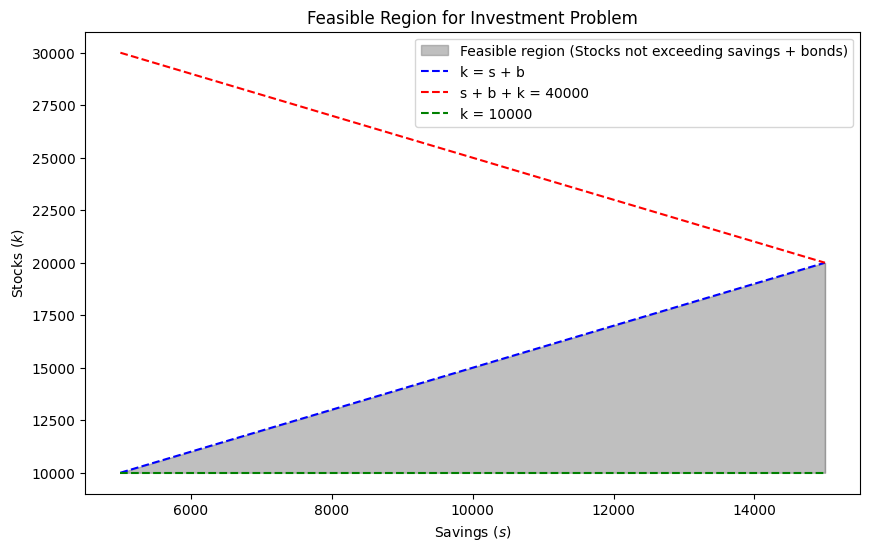

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for savings (s)
s = np.linspace(5000, 15000, 400)

# Assume bonds investment (b)
b = 5000

# Constraints
k_min = np.full_like(s, 10000)  # k >= 10000
k_max = s + b  # k <= s + b
total_investment_max = 40000 - s - b  # s + b + k <= 40000, solving for k

# Set up the plot
plt.figure(figsize=(10, 6))

# Plotting each constraint
plt.fill_between(s, k_min, k_max, where=(k_max <= total_investment_max), color='gray', alpha=0.5, label='Feasible region (Stocks not exceeding savings + bonds)')
plt.fill_between(s, k_min, total_investment_max, where=(total_investment_max <= k_max), color='gray', alpha=0.5)

# Adding constraint lines for clarity
plt.plot(s, k_max, label='k = s + b', linestyle='--', color='blue')
plt.plot(s, total_investment_max, label='s + b + k = 40000', linestyle='--', color='red')
plt.plot(s, k_min, label='k = 10000', linestyle='--', color='green')

# Labeling axes
plt.xlabel('Savings ($s$)')
plt.ylabel('Stocks ($k$)')
plt.title('Feasible Region for Investment Problem')
plt.legend()

# Show the plot
plt.show()
